# IS 733 - Data Mining Group Project

# Project Title: Tradeoffs of cost and quality of hospital care

# 1. Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Loading the Datasets

In [2]:
import pandas as pd

# Read the dataset into a Pandas DataFrame
ds1 = pd.read_excel(r"C:\Users\srava\Downloads\Agency for Healthcare Research and Quality.csv.xlsx")
ds2 = pd.read_excel(r"C:\Users\srava\Downloads\Hospital_Data.csv.xlsx")
ds3 = pd.read_excel(r"C:\Users\srava\Downloads\Medicare Spending Per Patient.csv.xlsx")

# 3. Basic Info of the Datasets

In [4]:
ds1.head()

,Provider Number,Hospital Name,Address 1,Address 2,Address 3,City,State,ZIP Code,County Name,Phone Number,...,Lower Estimate - A wound that splits open after surgery,Higher Estimate - A wound that splits open after surgery,Number of Patients - Accidental cuts and tears from medical treatment,Rate - Accidental cuts and tears from medical treatment,Lower Estimate - Accidental cuts and tears from medical treatment,Higher Estimate - Accidental cuts and tears from medical treatment,Number of Patients - Serious Complications,Rate - Serious Complications,Lower Estimate - Serious Complications,Higher Estimate - Serious Complications
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,NaN,NaN,DOTHAN,AL,36301,HOUSTON,3347938701,...,0,1.9,15415,3.07,2.28,3.86,Not Available,0.68,0.52,0.84
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,NaN,NaN,BOAZ,AL,35957,MARSHALL,2565938310,...,0,2.59,4224,1.58,0.08,3.09,Not Available,0.48,0.16,0.79
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,NaN,NaN,FLORENCE,AL,35631,LAUDERDALE,2567688400,...,0,2.97,10672,2.94,1.91,3.96,Not Available,0.8,0.59,1.02
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,NaN,NaN,OPP,AL,36467,COVINGTON,3344933541,...,0,3.05,1878,2.06,0.05,4.07,Not Available,0.64,0.23,1.05
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,NaN,NaN,LUVERNE,AL,36049,CRENSHAW,3343353374,...,Not Available,Not Available,752,1.68,0,3.98,Not Available,0.57,0.1,1.04


In [7]:
ds2.head()

,Provider Number,Hospital Name,Address 1,Address 2,Address 3,City,State,ZIP Code,County,Phone Number,Hospital Type,Hospital Ownership,Emergency Services
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,NaN,NaN,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,Yes
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,NaN,NaN,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,Yes
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,NaN,NaN,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,Yes
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,NaN,NaN,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,Yes
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,NaN,NaN,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,No


In [9]:
ds3.head()

,Provider ID,Hospital Name,Address 1,Address 2,Address 3,City,State,ZIP Code,County Name,Phone Number,Measure,Spending per Hospital Patient with Medicare,Footnote
0,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NaN,NaN,NEW YORK,NY,10021,NEW YORK,2126061000,Spending per Hospital Patient with Medicare,1.02,NaN
1,420091,CAROLINAS HOSPITAL SYSTEM,805 PAMPLICO HWY BOX 100550,NaN,NaN,FLORENCE,SC,29505,FLORENCE,8436742500,Spending per Hospital Patient with Medicare,0.99,NaN
2,340147,NASH GENERAL HOSPITAL,2460 CURTIS ELLIS DRIVE,NaN,NaN,ROCKY MOUNT,NC,27804,NASH,2524438000,Spending per Hospital Patient with Medicare,0.98,NaN
3,140053,ST JOHNS HOSPITAL,800 E CARPENTER ST,NaN,NaN,SPRINGFIELD,IL,62769,SANGAMON,2175446464,Spending per Hospital Patient with Medicare,0.93,NaN
4,50485,LONG BEACH MEMORIAL MEDICAL CENTER,2801 ATLANTIC AVE,NaN,NaN,LONG BEACH,CA,90806,LOS ANGELES,5629332000,Spending per Hospital Patient with Medicare,1.05,NaN


In [11]:
ds1.shape

(4677, 46)

In [13]:
ds2.shape

(4859, 13)

In [15]:
ds3.shape

(3320, 13)

In [21]:
ds1.describe()

,Provider Number,Address 2,Address 3,ZIP Code,Phone Number
count,4677.000000,0.0,0.0,4677.000000,4.677000e+03
mean,266570.247381,NaN,NaN,53492.977122,5.844598e+09
std,155232.207040,NaN,NaN,26950.723375,2.331464e+09
min,10001.000000,NaN,NaN,603.000000,9.369338e+08
25%,140181.000000,NaN,NaN,32565.000000,3.865862e+09
50%,260011.000000,NaN,NaN,54840.000000,6.052243e+09
75%,390150.000000,NaN,NaN,75457.000000,7.877276e+09
max,670085.000000,NaN,NaN,99929.000000,9.898943e+09


In [23]:
ds2.describe()

,Address 2,Address 3,ZIP Code,Phone Number
count,0.0,0.0,4859.000000,4.859000e+03
mean,NaN,NaN,53333.700967,5.835501e+09
std,NaN,NaN,26982.897975,2.329571e+09
min,NaN,NaN,603.000000,9.369338e+08
25%,NaN,NaN,32437.500000,3.862906e+09
50%,NaN,NaN,54660.000000,6.037479e+09
75%,NaN,NaN,75409.500000,7.876517e+09
max,NaN,NaN,99929.000000,9.898943e+09


In [11]:
ds3.describe()

,Provider ID,Address 2,Address 3,ZIP Code,Phone Number
count,3320.000000,0.0,0.0,3320.000000,3.320000e+03
mean,263420.686446,NaN,NaN,52430.949699,5.892834e+09
std,160468.927455,NaN,NaN,27689.961290,2.389623e+09
min,10001.000000,NaN,NaN,1040.000000,9.369338e+08
25%,110127.250000,NaN,NaN,30606.000000,3.527454e+09
50%,260026.000000,NaN,NaN,49420.000000,6.062278e+09
75%,390157.750000,NaN,NaN,76231.000000,8.063033e+09
max,670083.000000,NaN,NaN,99835.000000,9.898943e+09


In [12]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4677 entries, 0 to 4676
Data columns (total 46 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Provider Number                                                                4677 non-null   int64  
 1   Hospital Name                                                                  4677 non-null   object 
 2   Address 1                                                                      4677 non-null   object 
 3   Address 2                                                                      0 non-null      float64
 4   Address 3                                                                      0 non-null      float64
 5   City                                                                           4677 non-null   object 
 6   State                   

In [13]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Provider Number     4859 non-null   object 
 1   Hospital Name       4859 non-null   object 
 2   Address 1           4859 non-null   object 
 3   Address 2           0 non-null      float64
 4   Address 3           0 non-null      float64
 5   City                4859 non-null   object 
 6   State               4859 non-null   object 
 7   ZIP Code            4859 non-null   int64  
 8   County              4727 non-null   object 
 9   Phone Number        4859 non-null   int64  
 10  Hospital Type       4859 non-null   object 
 11  Hospital Ownership  4859 non-null   object 
 12  Emergency Services  4859 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 493.6+ KB


In [14]:
ds3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Provider ID                                  3320 non-null   int64  
 1   Hospital Name                                3320 non-null   object 
 2   Address 1                                    3320 non-null   object 
 3   Address 2                                    0 non-null      float64
 4   Address 3                                    0 non-null      float64
 5   City                                         3320 non-null   object 
 6   State                                        3320 non-null   object 
 7   ZIP Code                                     3320 non-null   int64  
 8   County Name                                  3320 non-null   object 
 9   Phone Number                                 3320 non-null   int64  
 10  

# 4. Summary of the datasets

In [15]:
import pandas as pd

# Load datasets
ds1 = pd.read_excel("/Users/ananyasmaranikadivendi/Downloads/IS 733 Data mining Group project Datasets/Agency for Healthcare Research and Quality.csv.xlsx")
ds2 = pd.read_excel("/Users/ananyasmaranikadivendi/Downloads/IS 733 Data mining Group project Datasets/Hospital_Data.csv.xlsx")
ds3 = pd.read_excel("/Users/ananyasmaranikadivendi/Downloads/IS 733 Data mining Group project Datasets/Medicare Spending Per Patient.csv.xlsx")
# Display the first few rows and basic info
print("Hospital Data Summary:")
print(ds1.info())
print(ds1.head())

print("\nMedicare Spending Data Summary:")
print(ds2.info())
print(ds2.head())

print("\nQuality Data Summary:")
print(ds3.info())
print(ds3.head())

Hospital Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4677 entries, 0 to 4676
Data columns (total 46 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Provider Number                                                                4677 non-null   int64  
 1   Hospital Name                                                                  4677 non-null   object 
 2   Address 1                                                                      4677 non-null   object 
 3   Address 2                                                                      0 non-null      float64
 4   Address 3                                                                      0 non-null      float64
 5   City                                                                           4677 non-null   object 
 6   S

# 5. Null Values

In [21]:
ds1.isnull().any()

Provider Number                                                                  False
Hospital Name                                                                    False
Address 1                                                                        False
Address 2                                                                         True
Address 3                                                                         True
City                                                                             False
State                                                                            False
ZIP Code                                                                         False
County Name                                                                       True
Phone Number                                                                     False
Death from serious treatable complications after surgery                         False
Footnote - Death from serious treatable com

In [22]:
ds2.isnull().any()

Provider Number       False
Hospital Name         False
Address 1             False
Address 2              True
Address 3              True
City                  False
State                 False
ZIP Code              False
County                 True
Phone Number          False
Hospital Type         False
Hospital Ownership    False
Emergency Services    False
dtype: bool

In [23]:
ds3.isnull().any()

Provider ID                                    False
Hospital Name                                  False
Address 1                                      False
Address 2                                       True
Address 3                                       True
City                                           False
State                                          False
ZIP Code                                       False
County Name                                    False
Phone Number                                   False
Measure                                        False
Spending per Hospital Patient with Medicare    False
Footnote                                        True
dtype: bool

# 6. Duplicate values

In [24]:
ds1[ds1.duplicated()]

,Provider Number,Hospital Name,Address 1,Address 2,Address 3,City,State,ZIP Code,County Name,Phone Number,...,Lower Estimate - A wound that splits open after surgery,Higher Estimate - A wound that splits open after surgery,Number of Patients - Accidental cuts and tears from medical treatment,Rate - Accidental cuts and tears from medical treatment,Lower Estimate - Accidental cuts and tears from medical treatment,Higher Estimate - Accidental cuts and tears from medical treatment,Number of Patients - Serious Complications,Rate - Serious Complications,Lower Estimate - Serious Complications,Higher Estimate - Serious Complications


In [25]:
ds2[ds2.duplicated()]

,Provider Number,Hospital Name,Address 1,Address 2,Address 3,City,State,ZIP Code,County,Phone Number,Hospital Type,Hospital Ownership,Emergency Services


In [26]:
ds3[ds3.duplicated()]

,Provider ID,Hospital Name,Address 1,Address 2,Address 3,City,State,ZIP Code,County Name,Phone Number,Measure,Spending per Hospital Patient with Medicare,Footnote


# Data visualizations

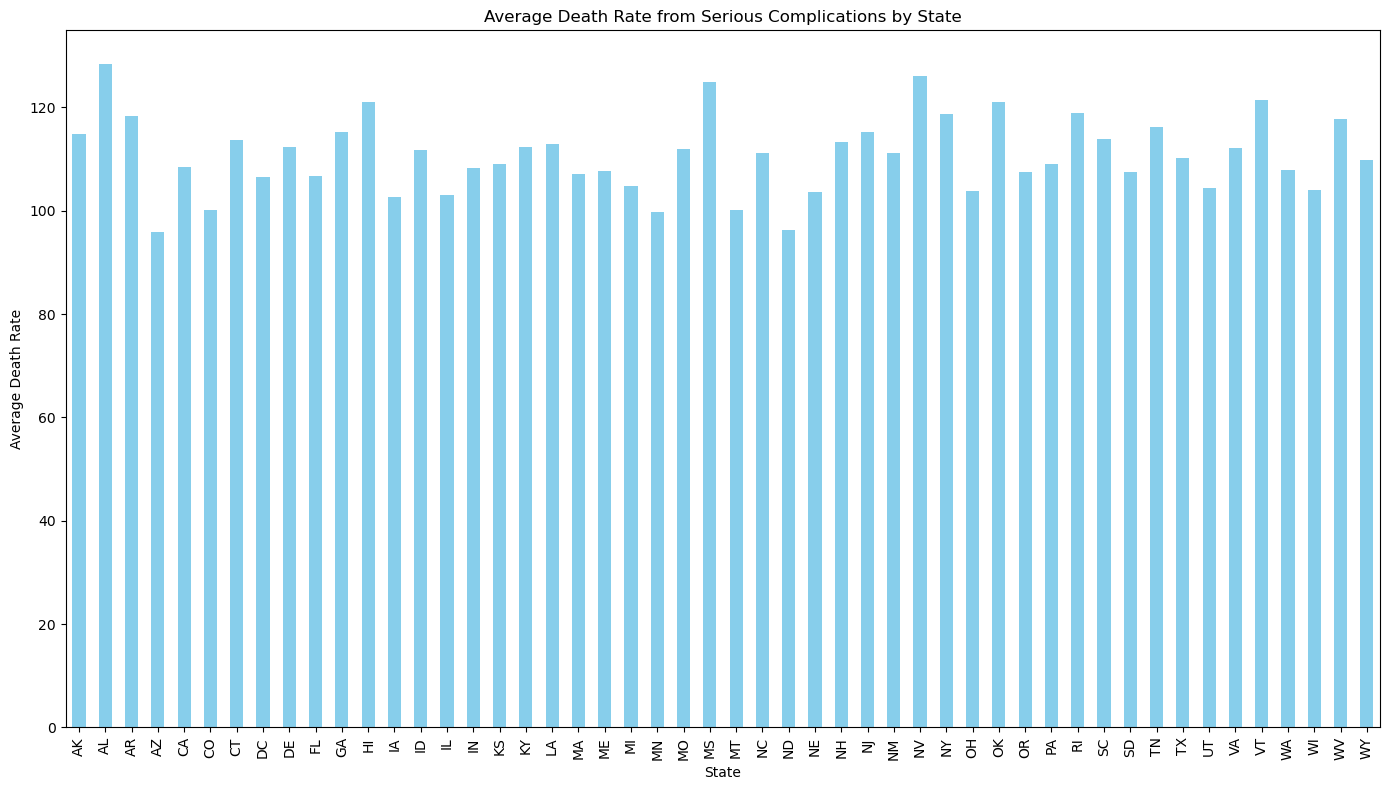

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
ds1 = pd.read_excel("/Users/ananyasmaranikadivendi/Downloads/IS 733 Data mining Group project Datasets/Agency for Healthcare Research and Quality.csv.xlsx")

# Convert necessary columns to numeric (assuming they may contain non-numeric values)
ds1['Rate - Death from serious treatable complications after surgery'] = pd.to_numeric(
    ds1['Rate - Death from serious treatable complications after surgery'], errors='coerce'
)

# Drop rows with NaN values in 'State' or 'Rate' columns
ds1 = ds1.dropna(subset=['State', 'Rate - Death from serious treatable complications after surgery'])

# Group by state and calculate the average rate for each state
avg_rate_by_state = ds1.groupby('State')['Rate - Death from serious treatable complications after surgery'].mean()

# Plotting
plt.figure(figsize=(14, 8))
avg_rate_by_state.plot(kind='bar', color='skyblue')
plt.title("Average Death Rate from Serious Complications by State")
plt.xlabel("State")
plt.ylabel("Average Death Rate")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

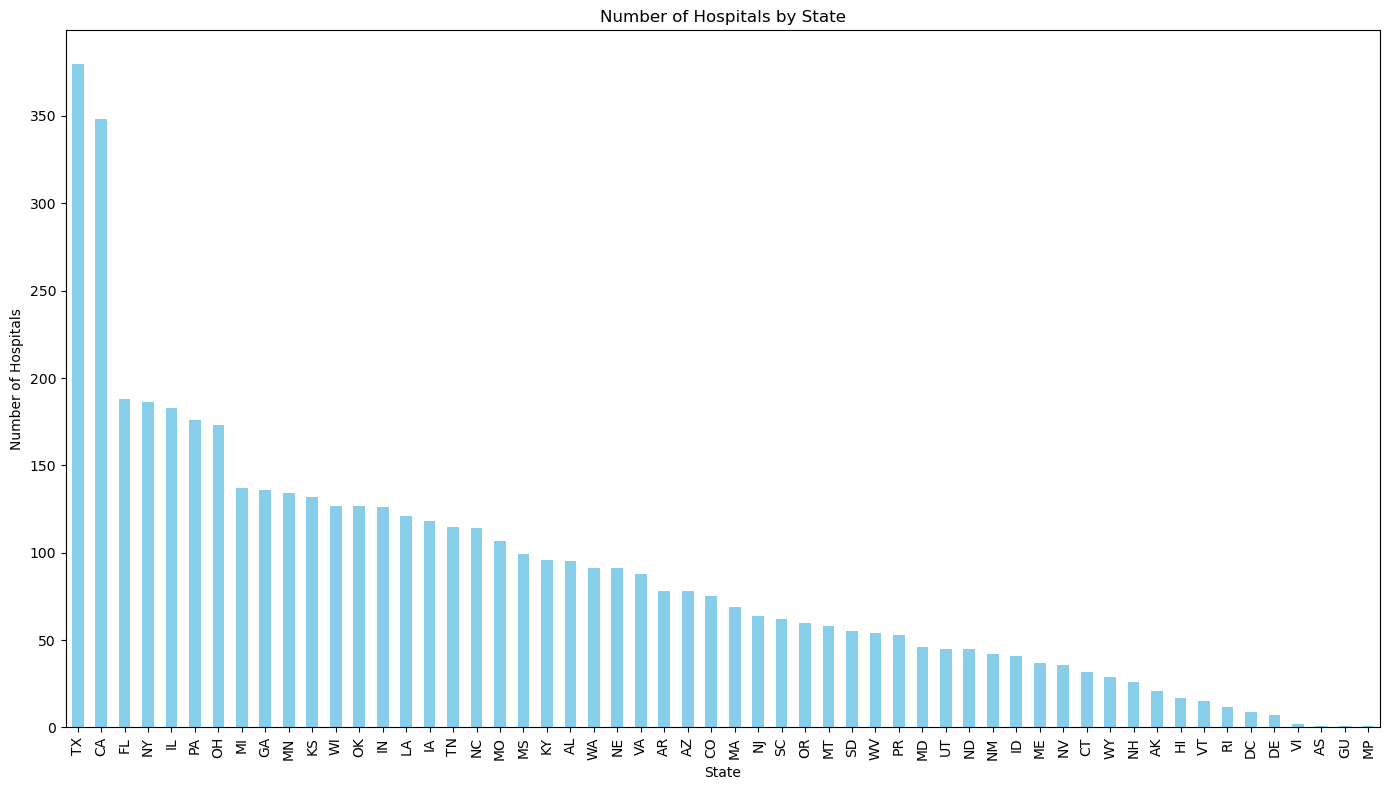

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
ds2 = pd.read_excel("/Users/ananyasmaranikadivendi/Downloads/IS 733 Data mining Group project Datasets/Hospital_Data.csv.xlsx")

# Drop any rows where 'State' might be missing
ds2 = ds2.dropna(subset=['State'])

# Group by 'State' and count the number of hospitals
hospital_count_by_state = ds2['State'].value_counts()

# Plotting
plt.figure(figsize=(14, 8))
hospital_count_by_state.plot(kind='bar', color='skyblue')
plt.title("Number of Hospitals by State")
plt.xlabel("State")
plt.ylabel("Number of Hospitals")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


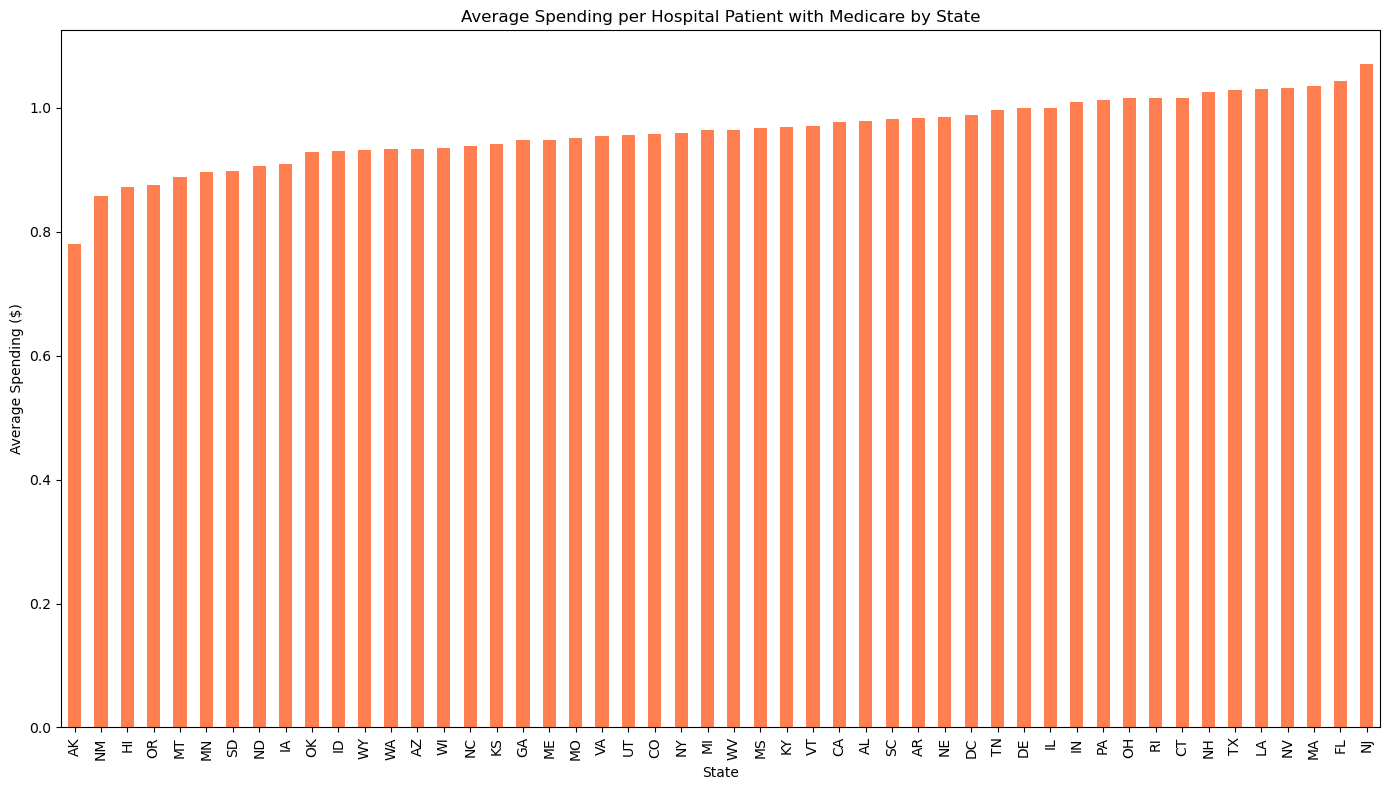

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
ds3 = pd.read_excel("/Users/ananyasmaranikadivendi/Downloads/IS 733 Data mining Group project Datasets/Medicare Spending Per Patient.csv.xlsx")

# Convert 'Spending per Hospital Patient with Medicare' to numeric, coercing errors to NaN for proper handling
ds3['Spending per Hospital Patient with Medicare'] = pd.to_numeric(ds3['Spending per Hospital Patient with Medicare'], errors='coerce')

# Drop rows with NaN values in the 'Spending per Hospital Patient with Medicare' column
ds3 = ds3.dropna(subset=['Spending per Hospital Patient with Medicare'])

# Calculate average spending per hospital patient by state
avg_spending_by_state = ds3.groupby('State')['Spending per Hospital Patient with Medicare'].mean()

# Plotting
plt.figure(figsize=(14, 8))
avg_spending_by_state.sort_values().plot(kind='bar', color='coral')
plt.title("Average Spending per Hospital Patient with Medicare by State")
plt.xlabel("State")
plt.ylabel("Average Spending ($)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [33]:
print(ds1['Rate - Death from serious treatable complications after surgery'].dtype)


object


In [34]:
print(ds1['Rate - Death from serious treatable complications after surgery'].unique())


[133.33 127.84 143.26 ... 162.32 131.75 119]


In [35]:
ds1['Rate - Death from serious treatable complications after surgery'] = pd.to_numeric(ds1['Rate - Death from serious treatable complications after surgery'], errors='coerce')


In [36]:
ds1 = ds1.dropna(subset=['Rate - Death from serious treatable complications after surgery'])


In [37]:
avg_quality_by_state = ds1.groupby('State')['Rate - Death from serious treatable complications after surgery'].mean()


# Bar Chart: Average Death Rate from Serious Complications by State

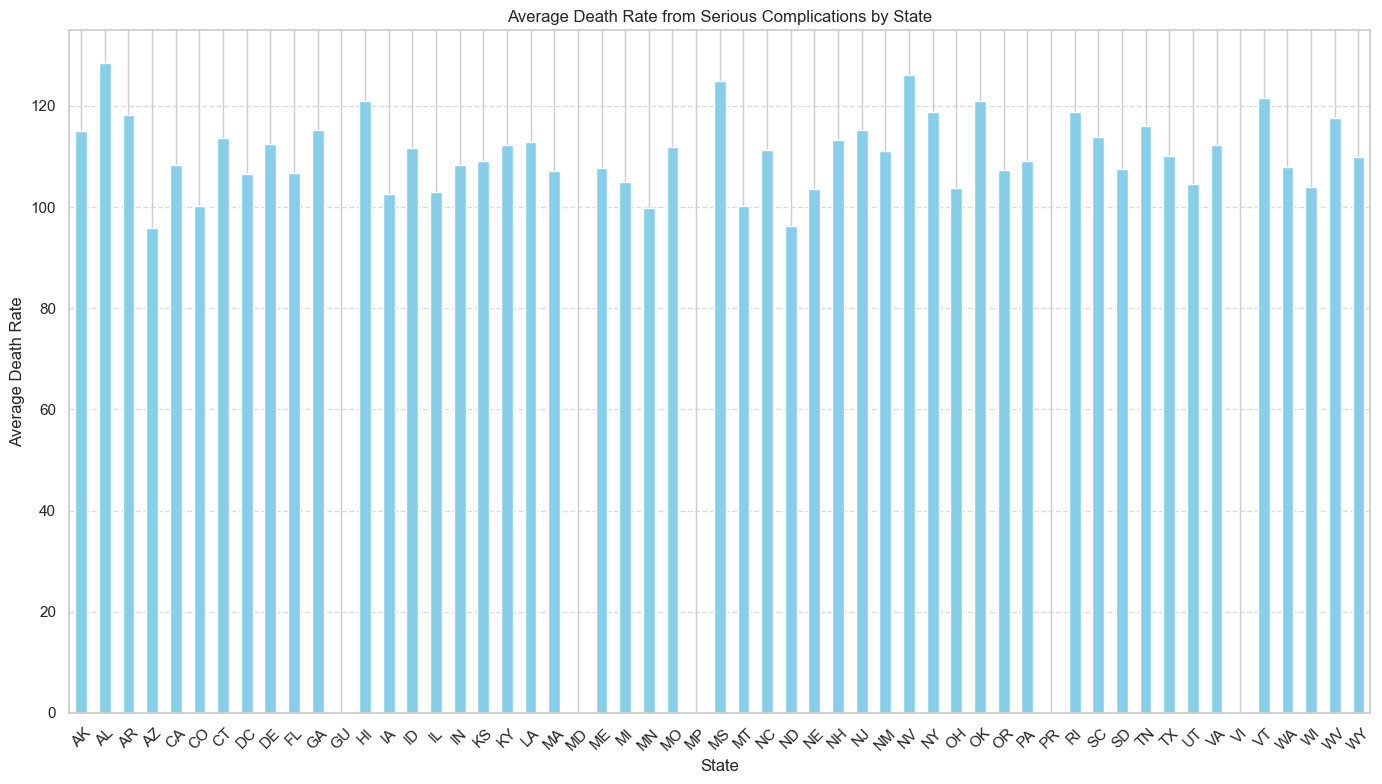

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
ds1 = pd.read_excel('/Users/ananyasmaranikadivendi/Downloads/IS 733 Data mining Group project Datasets/Agency for Healthcare Research and Quality.csv.xlsx')

# Convert the specific column to numeric, forcing errors to NaN
ds1['Rate - Death from serious treatable complications after surgery'] = pd.to_numeric(
    ds1['Rate - Death from serious treatable complications after surgery'], 
    errors='coerce'
)

# Group by state and calculate the average
avg_quality_by_state = ds1.groupby('State')['Rate - Death from serious treatable complications after surgery'].mean()

# Create the bar chart
plt.figure(figsize=(14, 8))
avg_quality_by_state.plot(kind='bar', color='skyblue')
plt.title("Average Death Rate from Serious Complications by State")
plt.xlabel("State")
plt.ylabel("Average Death Rate")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [25]:
from skimpy import skim

skim(ds1)

C:\Users\srava\anaconda3\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 4677   │ │ string      │ 18    │                                                          │
│ │ Number of columns │ 23     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃      ┃      ┃          ┃          ┃          ┃         ┃          ┃         ┃          ┃        ┃  │
│ ┃ ame      ┃ NA   ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25     ┃ p50      ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Provider │    0 │    0 │   266600 │   155200 │    10000 │  140200 │   260000 │  390200 │   670100 │ ▇▇▇▇▆  │  │
│ │ Number   │      │      │          │          │          │         │          │         │          │        │  │
│ │ Address  │ 4677 │  100 │      nan │      nan │      nan │     nan │      nan │     nan │      nan │        │  │
│ │ 2        │      │      │          │          │          │         │          │         │          │        │  │
│ │ Address  │ 4677 │  100 │      nan │      nan │      nan │     nan │      nan │     nan │      nan │        │  │
│ │ 3        │      │      │          │          │          │         │          │         │          │        │  │
│ │ ZIP Code │    0 │    0 │    53490 │    26950 │      603 │   32560 │    54840 │   75460 │    99930 │ ▅▆▇▇▇▆ │  │
│ │ Phone    │    0 │    0 │ -4365000 │ 12550000 │ -2147000 │ -116200 │ -1713000 │ 9266000 │ 21460000 │ ▇▇▇▅▇▇ │  │
│ │ Number   │      │      │        0 │       00 │      000 │    0000 │       00 │      00 │       00 │        │  │
│ └──────────┴──────┴──────┴──────────┴──────────┴──────────┴─────────┴──────────┴─────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                         ┃ NA       ┃ NA %       ┃ words per row           ┃ total words        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Hospital Name                       │        0 │          0 │                     3.8 │              17954 │  │
│ │ Address 1                           │        0 │          0 │                     3.8 │              17554 │  │
│ │ City                                │        0 │          0 │                     1.2 │               5759 │  │
│ │ State                               │        0 │          0 │                       1 │               4677 │  │
│ │ County Name                         │        3 │       0.06 │                     1.1 │               5251 │  │
│ │ Death from serious treatable        │        0 │          0 │                     4.3 │              19897 │  │
│ │ complications after surgery         │          │    

In [27]:
from skimpy import skim

skim(ds2)

C:\Users\srava\anaconda3\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 4859   │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃      ┃      ┃          ┃          ┃          ┃         ┃          ┃         ┃          ┃        ┃  │
│ ┃ ame      ┃ NA   ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25     ┃ p50      ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Address  │ 4859 │  100 │      nan │      nan │      nan │     nan │      nan │     nan │      nan │        │  │
│ │ 2        │      │      │          │          │          │         │          │         │          │        │  │
│ │ Address  │ 4859 │  100 │      nan │      nan │      nan │     nan │      nan │     nan │      nan │        │  │
│ │ 3        │      │      │          │          │          │         │          │         │          │        │  │
│ │ ZIP Code │    0 │    0 │    53330 │    26980 │      603 │   32440 │    54660 │   75410 │    99930 │ ▅▆▇▇▇▆ │  │
│ │ Phone    │    0 │    0 │ -4168000 │ 12560000 │ -2147000 │ -116200 │ -1714000 │ 9269000 │ 21470000 │ ▇▇▇▅▇▇ │  │
│ │ Number   │      │      │        0 │       00 │      000 │    0000 │       00 │      00 │       00 │        │  │
│ └──────────┴──────┴──────┴──────────┴──────────┴──────────┴─────────┴──────────┴─────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA      ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Hospital Name                      │       0 │         0 │                      3.9 │                18828 │  │
│ │ Address 1                          │       0 │         0 │                      3.7 │                18220 │  │
│ │ City                               │       0 │         0 │                      1.2 │                 5992 │  │
│ │ State                              │       0 │         0 │                        1 │                 4859 │  │
│ │ County                             │     132 │      2.72 │                      1.1 │                 5309 │  │
│ │ Hospital Type                      │       0 │         0 │                        3 │                14789 │  │
│ │ Hospital Ownership                 │       0 │         0 │                      3.5 │                17245 │  │
│ │ Emergency Services                 │       0 │         0 │                        1 │                 4859 │  │
│ └────────────────────────────────────┴─────────┴──────

In [29]:
from skimpy import skim

skim(ds3)

C:\Users\srava\anaconda3\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3320   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃      ┃      ┃          ┃          ┃          ┃         ┃          ┃         ┃          ┃        ┃  │
│ ┃ ame      ┃ NA   ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25     ┃ p50      ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Provider │    0 │    0 │   263400 │   160500 │    10000 │  110100 │   260000 │  390200 │   670100 │ ▇▅▆▆▅  │  │
│ │ ID       │      │      │          │          │          │         │          │         │          │        │  │
│ │ Address  │ 3320 │  100 │      nan │      nan │      nan │     nan │      nan │     nan │      nan │        │  │
│ │ 2        │      │      │          │          │          │         │          │         │          │        │  │
│ │ Address  │ 3320 │  100 │      nan │      nan │      nan │     nan │      nan │     nan │      nan │        │  │
│ │ 3        │      │      │          │          │          │         │          │         │          │        │  │
│ │ ZIP Code │    0 │    0 │    52430 │    27690 │     1040 │   30610 │    49420 │   76230 │    99840 │ ▅▇▇▅▇▇ │  │
│ │ Phone    │    0 │    0 │ -4509000 │ 12500000 │ -2147000 │ -115800 │ -1520000 │ 9085000 │ 21460000 │ ▇▇▇▅▇▇ │  │
│ │ Number   │      │      │        0 │       00 │      000 │    0000 │       00 │      00 │       00 │        │  │
│ └──────────┴──────┴──────┴──────────┴──────────┴──────────┴─────────┴──────────┴─────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                ┃ NA         ┃ NA %        ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Hospital Name              │          0 │           0 │                        3.9 │                 12804 │  │
│ │ Address 1                  │          0 │           0 │                        3.7 │                 12268 │  │
│ │ City                       │          0 │           0 │                        1.2 │                  4143 │  │
│ │ State                      │          0 │           0 │                          1 │                  3320 │  │
│ │ County Name                │          0 │           0 │                        1.1 │                  3765 │  │
│ │ Measure                    │          0 │           0 │                          6 │                 19920 │  │
│ │ Footnote                   │       3261 │       98.2

In [35]:
ds1.head()
ds2.head()
ds3.head()

,Provider ID,Hospital Name,Address 1,Address 2,Address 3,City,State,ZIP Code,County Name,Phone Number,Measure,Spending per Hospital Patient with Medicare,Footnote
0,330270,HOSPITAL FOR SPECIAL SURGERY,535 EAST 70TH STREET,NaN,NaN,NEW YORK,NY,10021,NEW YORK,2126061000,Spending per Hospital Patient with Medicare,1.02,NaN
1,420091,CAROLINAS HOSPITAL SYSTEM,805 PAMPLICO HWY BOX 100550,NaN,NaN,FLORENCE,SC,29505,FLORENCE,8436742500,Spending per Hospital Patient with Medicare,0.99,NaN
2,340147,NASH GENERAL HOSPITAL,2460 CURTIS ELLIS DRIVE,NaN,NaN,ROCKY MOUNT,NC,27804,NASH,2524438000,Spending per Hospital Patient with Medicare,0.98,NaN
3,140053,ST JOHNS HOSPITAL,800 E CARPENTER ST,NaN,NaN,SPRINGFIELD,IL,62769,SANGAMON,2175446464,Spending per Hospital Patient with Medicare,0.93,NaN
4,50485,LONG BEACH MEMORIAL MEDICAL CENTER,2801 ATLANTIC AVE,NaN,NaN,LONG BEACH,CA,90806,LOS ANGELES,5629332000,Spending per Hospital Patient with Medicare,1.05,NaN


# TASK-1

In [52]:
Cost_data=ds3[['Hospital Name','Spending per Hospital Patient with Medicare']]

In [54]:
Cost_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 2 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Hospital Name                                3320 non-null   object
 1   Spending per Hospital Patient with Medicare  3320 non-null   object
dtypes: object(2)
memory usage: 52.0+ KB


In [60]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifying the original
Hospital_data = ds2.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode "Hospital Type" and "Hospital Ownership"
Hospital_data['Hospital Type'] = label_encoder.fit_transform(ds2['Hospital Type'])
Hospital_data['Hospital Ownership'] = label_encoder.fit_transform(ds2['Hospital Ownership'])
Hospital_data['Emergency Services'] = label_encoder.fit_transform(ds2['Emergency Services'])
Hospital_data=Hospital_data[['Provider Number','Hospital Type','Hospital Ownership','Emergency Services']]
Hospital_data['Provider Number'] = pd.to_numeric(Hospital_data['Provider Number'], errors='coerce')

In [62]:
Hospital_data['Hospital Type'].unique()

array([1, 0, 3, 2])

In [90]:
# Perform the merge
merged_ds = pd.merge(Cost_data, Hospital_data, how="outer")

# Get unique values of the 'Hospital Type' column
unique_hospital_types = merged_ds['Hospital Type'].unique()

# Print the unique values
print(unique_hospital_types)


MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [92]:
# Check the columns in both dataframes
print("Cost_data columns:", Cost_data.columns)
print("Hospital_data columns:", Hospital_data.columns)

# Assuming 'Provider Number' is the common column to merge on (adjust this based on your data)
merged_ds = pd.merge(Cost_data, Hospital_data, how="outer", on="Provider Number")

# Get unique values from the 'Hospital Type' column in the merged dataframe
unique_hospital_types = merged_ds['Hospital Type'].unique()

# Print unique values
print(unique_hospital_types)


Cost_data columns: Index(['Hospital Name', 'Spending per Hospital Patient with Medicare'], dtype='object')
Hospital_data columns: Index(['Provider Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services'],
      dtype='object')


KeyError: 'Provider Number'